Influence_Degree
{'1': 10, '2': 18, '3': 19, '4': 21, '5': 19, '6': 24, '7': 11, '8': 28, '9': 26, '10': 23, '11': 26, '13': 21, '12': 17, '14': 22, '19': 19, '15': 19, '17': 23, '16': 16, '18': 16}


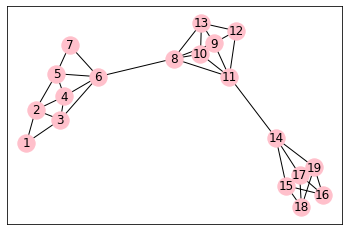

Leader 1 is node number 8
Diffrent Coefficient between leader 1 and others
{'1': 0.72, '2': 0.69, '3': 0.67, '4': 0.64, '5': 0.62, '6': 0.51, '7': 0.57, '8': 0.0, '9': 0.11, '10': 0.1, '11': 0.03, '13': 0.13, '12': 0.12, '14': 0.66, '19': 0.84, '15': 0.84, '17': 0.85, '16': 0.88, '18': 0.88}


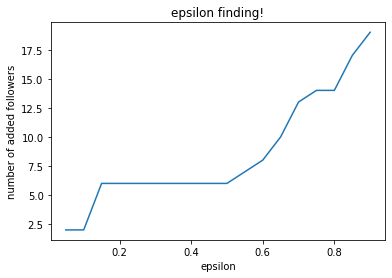

Influence_Degree
{'1': 10, '2': 18, '3': 19, '4': 21, '5': 19, '6': 24, '7': 11, '8': 0, '9': 0, '10': 0, '11': 0, '13': 0, '12': 0, '14': 22, '19': 19, '15': 19, '17': 23, '16': 16, '18': 16}


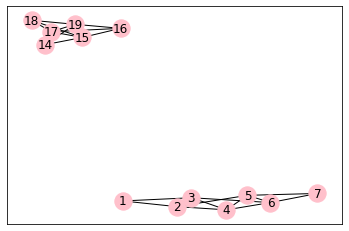

Leader 2 is node number 6
Diffrent Coefficient between leader 2 and others
{'1': 0.08, '2': 0.1, '3': 0.07, '4': 0.1, '5': 0.12, '6': 0.0, '7': 0.12, '8': 0.56, '9': 0.68, '10': 0.67, '11': 0.73, '13': 0.67, '12': 0.71, '14': 0.92, '19': 0.97, '15': 0.97, '17': 0.98, '16': 0.98, '18': 0.98}


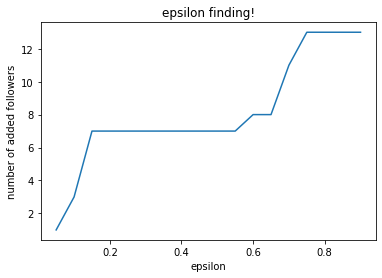

Influence_Degree
{'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '13': 0, '12': 0, '14': 22, '19': 19, '15': 19, '17': 23, '16': 16, '18': 16}


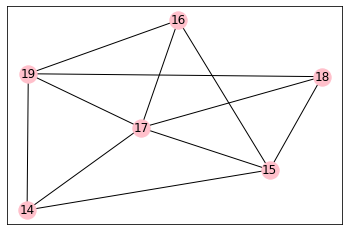

Leader 3 is node number 17
Diffrent Coefficient between leader 3 and others
{'1': 1.0, '2': 1.0, '3': 1.0, '4': 1.0, '5': 1.0, '6': 0.98, '7': 0.99, '8': 0.9, '9': 0.89, '10': 0.89, '11': 0.76, '13': 0.91, '12': 0.88, '14': 0.17, '19': 0.0, '15': 0.0, '17': 0.0, '16': 0.03, '18': 0.03}


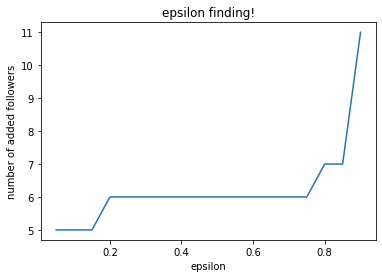

total num of clutering: 3
{1: ['8', '9', '10', '11', '13', '12'], 2: ['1', '2', '3', '4', '5', '6', '7'], 3: ['14', '19', '15', '17', '16', '18']}
clutering resullt: 


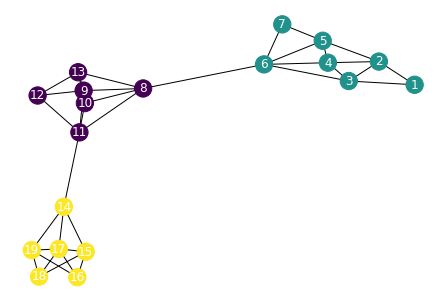

In [14]:
import networkx as nx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as NP
from scipy import linalg as LA
import scipy.sparse as sparse


Influence_Degree=dict()
Diffrent_Coefficient=dict()
Leader=list()
num_of_clusters=0
#a_dic_that_its_key_is_the_number_of_cluster_and_its_value_is_the_nodes_that_belong_to_clusters:
cluster=dict()
#a_dic_that_its_key_is_a_node_and_its_value_is_the_the_number_of_cluster_that_the_node_belongs_to:
clusters=dict()


#construct_example_graph
Orginal_G=nx.Graph()
Orginal_G.add_edges_from(
    [('1', '2'), ('1', '3'), ('2', '3'),('4', '2'), ('4', '3'), ('4', '5'), ('4', '6'),
     ('2', '5'), ('3', '6'), ('5', '6'), ('7', '5'), ('7', '6'),('8', '6'), ('8', '9'),
     ('8', '10'), ('8', '11'),('8', '13'), ('9', '10'), ('9', '11'), ('9', '12'),('9', '13'),
     ('10', '11'), ('10', '13'), ('11', '12'), ('12', '13'), ('9', '12'),('9', '13'),
     ('14', '11'), ('14', '19'), ('14', '15'), ('17', '14'), ('17', '15'),('17', '16'),
     ('17', '18'), ('17', '19'), ('15', '16'), ('16', '19'), ('15', '18'),('18', '19')])

#Calculate_Influence_Degree_for_all_nodes
Influence_Degree = Calculate_Influence_Degree(Orginal_G)
#saving_origenal_graph_from_change
G=Orginal_G.copy()
#loop_controling_vaiable:
node_to_be_clustering=True
while node_to_be_clustering:
    print("Influence_Degree")
    print(Influence_Degree)
    #show_nodes_in_graph_that_are_not_belong_to_a_specific_leader
    Show_Graph(G)
    #list_of_leaders
    Leader.append(max(Influence_Degree.items(), key=lambda k: k[1])[0])
    num_of_clusters += 1
    print("Leader "+str(num_of_clusters)+" is node number "+str(Leader[-1]))
    #Calculate_Influence_Degree_between_leader_node_and_all_other_nodes
    Diffrent_Coefficient = Consus_Dynamics(Orginal_G,str(Leader[-1]))
    print("Diffrent Coefficient between leader "+str(num_of_clusters)+" and others")
    print(Diffrent_Coefficient)
    #find_best_epsilon_for_specific_leader
    epsilon=Parameter_Setting(Diffrent_Coefficient)
    #leader_and_follower_deleted_from_graph
    G=Partner_Allocation(G,epsilon,Diffrent_Coefficient,num_of_clusters)
    
    if len(list(G))==0:
        node_to_be_clustering=False
        
   #deleting_the_influence_of_already_clustered_nodes    
    graph_nodes=G.nodes()
    for node in Influence_Degree.keys():
        if node not in graph_nodes:
            Influence_Degree[node]=0

print("total num of clutering: "+str(num_of_clusters)) 
#print_clusters    
print(cluster)  
print("clutering resullt: ")  
#for_coloring_the_clusters_threre_is_a_need_for_sorted_list    
sorted_dict = dict(sorted(clusters.items()))
nx.draw(Orginal_G, cmap=plt.get_cmap('viridis'), node_color=list(sorted_dict.values()), with_labels=True, font_color='white')
plt.show()

In [4]:
def Show_Graph(G):
    
    import matplotlib.pyplot as plt
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('gnuplot2'),node_color='pink')
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos,edge_color='black', arrows=True)
    plt.show()

In [5]:
def Calculate_Influence_Degree(G):
    Influence_Degree.clear()
    for node in G:
        Influence_Degree[node]=G.degree[node]
        for neighbour in G[node]:
            Influence_Degree[node]+=G.degree[neighbour]
    return Influence_Degree

In [6]:
def Consus_Dynamics(Orginal_G,Leader):
    new_state=dict()
    state=dict()
    new_state.clear()
    state.clear()
    Diffrent_Coefficient.clear()
    
    dmtr = nx.diameter(Orginal_G)
 
    for node in Orginal_G:
        state[node]=0
    state[Leader]=1
        
    visited=BFS_Search(Orginal_G,Leader)
    for i in range(dmtr):
        for node in visited:
            sm=0
            for neighbour in Orginal_G[node]: 
                sm= (state[neighbour]-state[node])+ sm  
            new_state[node] = state[node]+(sm/(Orginal_G.degree[node]+1))
        state =  new_state.copy()
    for node in Orginal_G:
               Diffrent_Coefficient[node] = round(abs((state[Leader] - state[node]) /state[Leader]),2)           
    return Diffrent_Coefficient

In [7]:
def BFS_Search(Orginal_G,Leader):
    #List_to_keep+track_of_visited_nodes.
    visited = [] 
    #Initialize_a_queue 
    queue = []        
    visited.append(Leader)
    queue.append(Leader)
    while queue:
        s = queue.pop(0) 
        for neighbour in Orginal_G[s]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
    return visited

In [8]:
def Parameter_Setting(Diffrent_Coefficient):
    
    from collections import Counter
    
    epsilon=0
    total_partners=dict()
    num_of_patners=list()
    
    #18_is_just_an_arbitrary_number
    for i in range (18):
        epsilon+=0.05
        count=0   
        for node in Orginal_G:
            if Diffrent_Coefficient[node] < epsilon:
                count =count+1
        num_of_patners.append(count)        
        total_partners[epsilon]=count
    frequent = Counter(total_partners.values()).most_common(1)
    x = [a_tuple[0] for a_tuple in frequent]
    for key, value in total_partners.items(): 
        if x[0] == value: 
            epsilon = key 
    Plot(num_of_patners)
    
    return epsilon

In [12]:
def Plot(num_of_patners):
    import matplotlib.pyplot as plt 
    #x_axis_values_according_to_arbitrary_number_in_"Parameter_Setting"_function
    x = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] 
    #corresponding_y_axis_values 
    y = num_of_patners
    plt.plot(x, y) 
    plt.xlabel('epsilon') 
    plt.ylabel('number of added followers') 
    plt.title('epsilon finding!') 
    plt.show()

In [13]:
def Partner_Allocation(G,epsilon,Diffrent_Coefficient,num_of_clusters):
    lst=list()
    for node in list(G):
        if Diffrent_Coefficient[node] < epsilon:
            lst.append(node)
            G.remove_node(node)
            clusters[int(node)]=(num_of_clusters)
         
    cluster[num_of_clusters]= lst       
    return G
    